<a href="https://colab.research.google.com/github/Abdul-ur-Rehman-Butt/PROJECT-2022-SE-27-07-39/blob/main/Training_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [ ]:


import numpy as np, pandas as pd
import sys
# sys.path.append("/path/to/directory/containing/metric.py")
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

test = pd.read_csv("/content/test.csv")
print("Test shape:", test.shape )

train = pd.read_csv("/content/train.csv")
print("Train shape:",train.shape)
train.head()

Test shape: (3, 58)
Train shape: (28800, 60)


,ID,dri_score,psych_disturb,cyto_score,diabetes,hla_match_c_high,hla_high_res_8,tbi_status,arrhythmia,hla_low_res_6,graft_type,vent_hist,renal_issue,pulm_severe,prim_disease_hct,hla_high_res_6,cmv_status,hla_high_res_10,hla_match_dqb1_high,tce_imm_match,hla_nmdp_6,hla_match_c_low,rituximab,hla_match_drb1_low,hla_match_dqb1_low,prod_type,cyto_score_detail,conditioning_intensity,ethnicity,year_hct,obesity,mrd_hct,in_vivo_tcd,tce_match,hla_match_a_high,hepatic_severe,donor_age,prior_tumor,hla_match_b_low,peptic_ulcer,age_at_hct,hla_match_a_low,gvhd_proph,rheum_issue,sex_match,hla_match_b_high,race_group,comorbidity_score,karnofsky_score,hepatic_mild,tce_div_match,donor_related,melphalan_dose,hla_low_res_8,cardiac,hla_match_drb1_high,pulm_moderate,hla_low_res_10,efs,efs_time
0,0,N/A - non-malignant indication,No,NaN,No,NaN,NaN,No TBI,No,6.0,Bone marrow,No,No,No,IEA,6.0,+/+,NaN,2.0,NaN,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2016,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,9.942,2.0,FKalone,No,M-F,2.0,More than one race,0.0,90.0,No,NaN,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,42.356
1,1,Intermediate,No,Intermediate,No,2.0,8.0,"TBI +- Other, >cGy",No,6.0,Peripheral blood,No,No,No,AML,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,PB,Intermediate,MAC,Not Hispanic or Latino,2008,No,Positive,No,Permissive,2.0,No,72.29,No,2.0,No,43.705,2.0,Other GVHD Prophylaxis,No,F-F,2.0,Asian,3.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,Yes,10.0,1.0,4.672
2,2,N/A - non-malignant indication,No,NaN,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,HIS,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,NaN,NaN,Not Hispanic or Latino,2019,No,NaN,Yes,NaN,2.0,No,NaN,No,2.0,No,33.997,2.0,Cyclophosphamide alone,No,F-M,2.0,More than one race,0.0,90.0,No,Permissive mismatched,Related,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,19.793
3,3,High,No,Intermediate,No,2.0,8.0,No TBI,No,6.0,Bone marrow,No,No,No,ALL,6.0,+/+,10.0,2.0,P/P,6.0,2.0,No,2.0,2.0,BM,Intermediate,MAC,Not Hispanic or Latino,2009,No,Positive,No,Permissive,2.0,No,29.23,No,2.0,No,43.245,2.0,FK+ MMF +- others,No,M-M,2.0,White,0.0,90.0,Yes,Permissive mismatched,Unrelated,"N/A, Mel not given",8.0,No,2.0,No,10.0,0.0,102.349
4,4,High,No,NaN,No,2.0,8.0,No TBI,No,6.0,Peripheral blood,No,No,No,MPN,6.0,+/+,10.0,2.0,NaN,5.0,2.0,No,2.0,2.0,PB,NaN,MAC,Hispanic or Latino,2018,No,NaN,Yes,NaN,2.0,No,56.81,No,2.0,No,29.740,2.0,TDEPLETION +- other,No,M-F,2.0,American Indian or Alaska Native,1.0,90.0,No,Permissive mismatched,Related,MEL,8.0,No,2.0,No,10.0,0.0,16.223


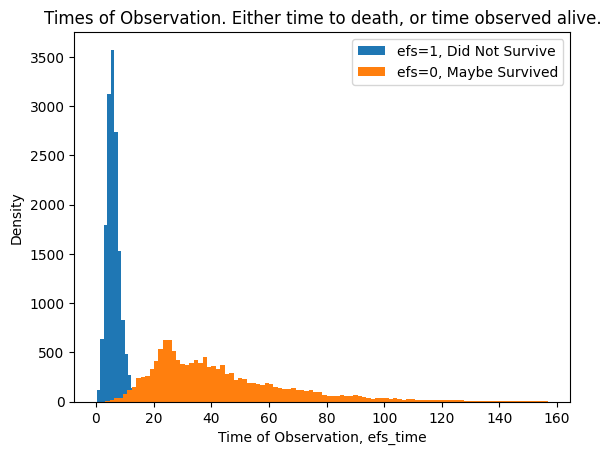

In [ ]:
plt.hist(train.loc[train.efs==1,"efs_time"],bins=100,label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs==0,"efs_time"],bins=100,label="efs=0, Maybe Survived")
plt.xlabel("Time of Observation, efs_time")
plt.ylabel("Density")
plt.title("Times of Observation. Either time to death, or time observed alive.")
plt.legend()
plt.show()

In [ ]:
!pip install lifelines
from lifelines import KaplanMeierFitter

def transform_survival_probability(df, time_col='efs_time', event_col='efs'):
    """
    Transform using survival probability estimates
    """
    kmf = KaplanMeierFitter()
    kmf.fit(df[time_col], df[event_col])

    # Get survival probabilities at each time point
    y = kmf.survival_function_at_times(df[time_col]).values

    # Adjust for censoring
    # censored_mask = df[event_col] == 0
    #y[censored_mask] = y[censored_mask] * 1.2  # Increase survival prob for censored

    return y

train["y"] = transform_survival_probability(train, time_col='efs_time', event_col='efs')


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.6 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=335a91305393b5d105e51628195fee799c3185da3694a68cee25274d134d95d6
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


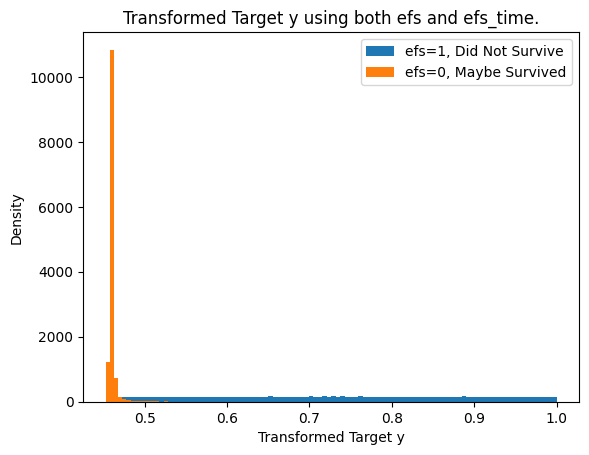

In [ ]:
plt.hist(train.loc[train.efs==1,"y"],bins=100,label="efs=1, Did Not Survive")
plt.hist(train.loc[train.efs==0,"y"],bins=100,label="efs=0, Maybe Survived")
plt.xlabel("Transformed Target y")
plt.ylabel("Density")
plt.title("Transformed Target y using both efs and efs_time.")
plt.legend()
plt.show()

In [ ]:
RMV = ["ID","efs","efs_time","y"]
FEATURES = [c for c in train.columns if not c in RMV]
print(f"There are {len(FEATURES)} FEATURES: {FEATURES}")

There are 57 FEATURES: ['dri_score', 'psych_disturb', 'cyto_score', 'diabetes', 'hla_match_c_high', 'hla_high_res_8', 'tbi_status', 'arrhythmia', 'hla_low_res_6', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'hla_high_res_6', 'cmv_status', 'hla_high_res_10', 'hla_match_dqb1_high', 'tce_imm_match', 'hla_nmdp_6', 'hla_match_c_low', 'rituximab', 'hla_match_drb1_low', 'hla_match_dqb1_low', 'prod_type', 'cyto_score_detail', 'conditioning_intensity', 'ethnicity', 'year_hct', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hla_match_a_high', 'hepatic_severe', 'donor_age', 'prior_tumor', 'hla_match_b_low', 'peptic_ulcer', 'age_at_hct', 'hla_match_a_low', 'gvhd_proph', 'rheum_issue', 'sex_match', 'hla_match_b_high', 'race_group', 'comorbidity_score', 'karnofsky_score', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'hla_low_res_8', 'cardiac', 'hla_match_drb1_high', 'pulm_moderate', 'hla_low_res_10']


In [ ]:
hct_ci_mapping = {
    "arrhythmia": {"No": 0, "Not done": 0, "Yes": 1},
    "cardiac": {"No": 0, "Not done": 0, "Yes": 1},
    "diabetes": {"No": 0, "Not done": 0, "Yes": 1},
    "hepatic_mild": {"No": 0, "Not done": 0, "Yes": 1},
    "hepatic_severe": {"No": 0, "Not done": 0, "Yes": 3},
    "psych_disturb": {"No": 0, "Not done": 0, "Yes": 1},
    "obesity": {"No": 0, "Not done": 0, "Yes": 1},
    "rheum_issue": {"No": 0, "Not done": 0, "Yes": 2},
    "peptic_ulcer": {"No": 0, "Not done": 0, "Yes": 2},
    "renal_issue": {"No": 0, "Not done": 0, "Yes": 2},
    "prior_tumor": {"No": 0, "Not done": 0, "Yes": 3},
    "pulm_moderate": {"No": 0, "Not done": 0, "Yes": 2},
    "pulm_severe": {"No": 0, "Not done": 0, "Yes": 3},
}
def calculate_hct_ci_score(row, mapping):
        """
        This function calculates the hct_ci score

        Args:
            row (pd.Series): Patient Clinical Data
            mapping (dict): HCT-CI score mapping

        Returns:
            int: HCT-CI score
        """

        score = 0

        if "hepatic_severe" in row and row["hepatic_severe"] == "Yes":
            score += mapping["hepatic_severe"]["Yes"]
        elif "hepatic_mild" in row and row["hepatic_mild"] == "Yes":
            score += mapping["hepatic_mild"]["Yes"]
        if "pulm_moderate" in row and row["pulm_moderate"] == "Yes":
            score += mapping["pulm_moderate"]["Yes"]
        elif "pulm_severe" in row and row["pulm_severe"] == "Yes":
            score += mapping["pulm_severe"]["Yes"]

        # Other Conditions
        for condition, mapping_values in mapping.items():
            if condition not in ["hepatic_mild", "hepatic_severe","pulm_moderate", "pulm_severe"] and condition in row:
                score += mapping_values.get(row[condition], 0)

        return score

In [ ]:
# cat2num function is used for mapping some of the Categorical Values into Numerical Values

def cat2num(df):
    df['conditioning_intensity'] = df['conditioning_intensity'].map({
    'NMA': 1,
    'RIC': 2,
    'MAC': 3,
    'TBD': None,
    'No drugs reported': None,
    'N/A, F(pre-TED) not submitted': None})

    df['tbi_status'] = df['tbi_status'].map({
    'No TBI': 0,
    'TBI +- Other, <=cGy': 1,
    'TBI +- Other, -cGy, fractionated': 2,
    'TBI + Cy +- Other': 3,
    'TBI +- Other, -cGy, single': 4,
    'TBI +- Other, >cGy': 5,
    'TBI +- Other, unknown dose': None})

    df['dri_score'] = df['dri_score'].map({
    'Low': 1,
    'Intermediate': 2,
    'Intermediate - TED AML case <missing cytogenetics': 3,
    'High': 4,
    'High - TED AML case <missing cytogenetics': 5,
    'Very High': 6,
    'N/A - pediatric': -3,
    'N/A - non-malignant indication': -1,
    'TBD cytogenetics': -2,
    'N/A - disease not classifiable': -4,
    'Missing disease status': 0})

    df['cyto_score'] = df['cyto_score'].map({
    'Poor': 4,
    'Normal': 3,
    'Intermediate': 2,
    'Favorable': 1,
    'TBD': -1,
    'Other': -2,
    'Not tested': None})

    df['cyto_score_detail'] = df['cyto_score_detail'].map({
    'Poor': 3,
    'Intermediate': 2,
    'Favorable': 1,
    'TBD': -1,
    'Not tested': None})

    return df

In [ ]:
def fill_hla_combined_low(row):
    if np.isnan(row['hla_combined_low']):
        components = [
            row['hla_match_drb1_low'], row['hla_match_dqb1_low'],
            row['hla_match_a_low'], row['hla_match_b_low'], row['hla_match_c_low']
        ]
        if all([not np.isnan(x) for x in components]):
            return sum(components)
        else:
            if not np.isnan(row['hla_low_res_8']) and not np.isnan(row['hla_match_dqb1_low']):
                return row['hla_low_res_8'] + row['hla_match_dqb1_low']
            elif not np.isnan(row['hla_low_res_6']):
                components_6 = [
                    row['hla_match_dqb1_low'], row['hla_match_c_low']
                ]
                if all([not np.isnan(x) for x in components_6]):
                    return row['hla_low_res_6'] + sum(components_6)
                else:
                    return sum([x for x in components if not np.isnan(x)])
    return row['hla_combined_low']

In [ ]:
def add_features(df):
    df["hct_ci_score"] = df.apply(lambda row: calculate_hct_ci_score(row, hct_ci_mapping), axis=1)
    df['donor_recipient_age_diff'] = abs(df['donor_age'] - df['age_at_hct'])
    df = cat2num(df)
    df['hla_combined_low'] = df['hla_low_res_10']
    df['hla_combined_low'] = df.apply(fill_hla_combined_low, axis=1)
    df['hla_match_ratio'] = (df['hla_high_res_8'] + df['hla_low_res_8']) / 16
    df['years_since_2000'] = df['year_hct'] - 2000
    df['null_count'] = df.isnull().sum(axis=1)
    df['ci_score_danger'] = df['hct_ci_score'].apply(lambda x: 2 if x >= 3 else 1 if x >= 1 else 0)
    return df

train = add_features(train)
test = add_features(test)

In [ ]:
CATS = []
for c in FEATURES:
    if train[c].dtype=="object":
        CATS.append(c)
        train[c] = train[c].fillna("NAN")
        test[c] = test[c].fillna("NAN")
print(f"In these features, there are {len(CATS)} CATEGORICAL FEATURES: {CATS}")

In these features, there are 30 CATEGORICAL FEATURES: ['psych_disturb', 'diabetes', 'arrhythmia', 'graft_type', 'vent_hist', 'renal_issue', 'pulm_severe', 'prim_disease_hct', 'cmv_status', 'tce_imm_match', 'rituximab', 'prod_type', 'ethnicity', 'obesity', 'mrd_hct', 'in_vivo_tcd', 'tce_match', 'hepatic_severe', 'prior_tumor', 'peptic_ulcer', 'gvhd_proph', 'rheum_issue', 'sex_match', 'race_group', 'hepatic_mild', 'tce_div_match', 'donor_related', 'melphalan_dose', 'cardiac', 'pulm_moderate']


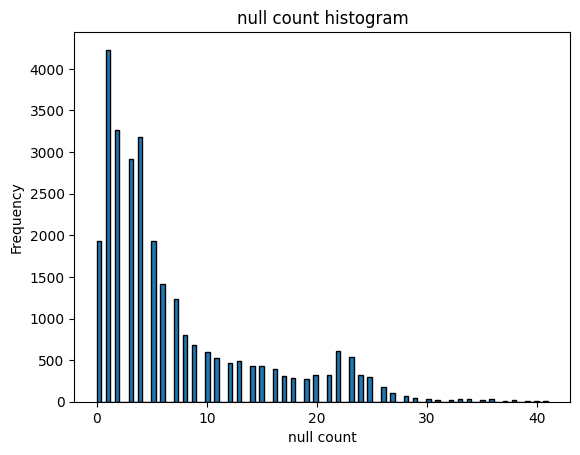

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

plt.hist(train['null_count'], bins=100, edgecolor='black')  # bins를 조절하여 구간 개수 변경 가능
plt.xlabel('null count')
plt.ylabel('Frequency')
plt.title('null count histogram')
plt.show()

In [ ]:
combined = pd.concat([train,test],axis=0,ignore_index=True)
#print("Combined data shape:", combined.shape )

# LABEL ENCODE CATEGORICAL FEATURES
print("We LABEL ENCODE the CATEGORICAL FEATURES: ",end="")
for c in FEATURES:

    # LABEL ENCODE CATEGORICAL AND CONVERT TO INT32 CATEGORY
    if c in CATS:
        print(f"{c}, ",end="")
        combined[c],_ = combined[c].factorize()
        combined[c] -= combined[c].min()
        combined[c] = combined[c].astype("int32")
        combined[c] = combined[c].astype("category")

    # REDUCE PRECISION OF NUMERICAL TO 32BIT TO SAVE MEMORY
    else:
        if combined[c].dtype=="float64":
            combined[c] = combined[c].astype("float32")
        if combined[c].dtype=="int64":
            combined[c] = combined[c].astype("int32")

# for c in cat2num:
#     combined[c] = combined[c].astype("int32")

train = combined.iloc[:len(train)].copy()
test = combined.iloc[len(train):].reset_index(drop=True).copy()

We LABEL ENCODE the CATEGORICAL FEATURES: psych_disturb, diabetes, arrhythmia, graft_type, vent_hist, renal_issue, pulm_severe, prim_disease_hct, cmv_status, tce_imm_match, rituximab, prod_type, ethnicity, obesity, mrd_hct, in_vivo_tcd, tce_match, hepatic_severe, prior_tumor, peptic_ulcer, gvhd_proph, rheum_issue, sex_match, race_group, hepatic_mild, tce_div_match, donor_related, melphalan_dose, cardiac, pulm_moderate, 

In [ ]:
FEATURES += ["hct_ci_score", 'donor_recipient_age_diff', "hla_combined_low", "hla_match_ratio",
             "years_since_2000", "null_count","ci_score_danger"]

In [ ]:
from sklearn.model_selection import KFold
from xgboost import XGBRegressor, XGBClassifier
import xgboost
print("Using XGBoost version",xgboost.__version__)

Using XGBoost version 2.1.4


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

FOLDS = 5
kf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb = np.zeros(len(train))
pred_efs = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train, train["efs"])):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)

    x_train = train.loc[train_index, FEATURES].copy()
    y_train = train.loc[train_index, "efs"]
    x_valid = train.loc[test_index, FEATURES].copy()
    y_valid = train.loc[test_index, "efs"]
    x_test = test[FEATURES].copy()

    model_xgb = XGBClassifier(
        device="cuda",
        max_depth=3,
        colsample_bytree=0.7129400756425178,
        subsample=0.8185881823156917,
        n_estimators=20_000,
        learning_rate=0.04425768131771064,
        eval_metric="auc",
        early_stopping_rounds=50,
        objective='binary:logistic',
        scale_pos_weight=1.5379160847615545,
        min_child_weight=4,
        enable_categorical=True,
        gamma=3.1330719334577584
    )
    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=100
    )

    # INFER OOF (Probabilities -> Binary)
    oof_xgb[test_index] = (model_xgb.predict_proba(x_valid)[:, 1] > 0.5).astype(int)
    # INFER TEST (Probabilities -> Average Probs)
    pred_efs += model_xgb.predict_proba(x_test)[:, 1]

# COMPUTE AVERAGE TEST PREDS
pred_efs = (pred_efs / FOLDS > 0.5).astype(int)

# EVALUATE PERFORMANCE
accuracy = accuracy_score(train["efs"], oof_xgb)
f1 = f1_score(train["efs"], oof_xgb)
roc_auc = roc_auc_score(train["efs"], oof_xgb)

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")


#########################
### Fold 1
#########################
[0]	validation_0-auc:0.65118


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:54] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:03:54] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.72440
[200]	validation_0-auc:0.73385
[300]	validation_0-auc:0.73894
[400]	validation_0-auc:0.74183
[500]	validation_0-auc:0.74303
[600]	validation_0-auc:0.74370
[700]	validation_0-auc:0.74435
[800]	validation_0-auc:0.74484
[801]	validation_0-auc:0.74485
#########################
### Fold 2
#########################
[0]	validation_0-auc:0.67219


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:02] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:02] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.74742
[200]	validation_0-auc:0.75682
[300]	validation_0-auc:0.76037
[400]	validation_0-auc:0.76289
[500]	validation_0-auc:0.76404
[543]	validation_0-auc:0.76405
#########################
### Fold 3
#########################
[0]	validation_0-auc:0.66749


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:09] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:09] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.74643
[200]	validation_0-auc:0.75634
[300]	validation_0-auc:0.75979
[400]	validation_0-auc:0.76143
[500]	validation_0-auc:0.76212
[600]	validation_0-auc:0.76283
[635]	validation_0-auc:0.76289
#########################
### Fold 4
#########################
[0]	validation_0-auc:0.65938


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:15] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:15] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.74188
[200]	validation_0-auc:0.75155
[300]	validation_0-auc:0.75592
[400]	validation_0-auc:0.75839
[500]	validation_0-auc:0.76059
[600]	validation_0-auc:0.76210
[700]	validation_0-auc:0.76292
[754]	validation_0-auc:0.76282
#########################
### Fold 5
#########################
[0]	validation_0-auc:0.66344


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:24] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:04:24] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-auc:0.73844
[200]	validation_0-auc:0.74572
[300]	validation_0-auc:0.74980
[400]	validation_0-auc:0.75127
[500]	validation_0-auc:0.75201
[541]	validation_0-auc:0.75195
Accuracy: 0.6756
F1 Score: 0.7454
ROC AUC Score: 0.6582


In [ ]:
bin_pred = oof_xgb
bin_pred

array([0., 1., 0., ..., 1., 0., 0.])

In [ ]:
pred_classifier = pred_efs
pred_classifier

array([0, 1, 0])

In [ ]:
%%time
FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_xgb = np.zeros(len(train))
pred_xgb = np.zeros(len(test))

for i, (train_index, test_index) in enumerate(kf.split(train)):

    print("#"*25)
    print(f"### Fold {i+1}")
    print("#"*25)

    x_train = train.loc[train_index,FEATURES].copy()
    y_train = train.loc[train_index,"y"]
    x_valid = train.loc[test_index,FEATURES].copy()
    y_valid = train.loc[test_index,"y"]
    x_test = test[FEATURES].copy()

    model_xgb = XGBRegressor(
        device="cpu",
        max_depth=5,
        colsample_bytree=0.4309907360736148,
        subsample=0.6727848987288046,
        n_estimators=10_000,
        learning_rate=0.03509792076095853,
        eval_metric="mae",
        early_stopping_rounds=25,
        objective='reg:logistic',
        enable_categorical=True,
        min_child_weight=10,
        reg_alpha= 2.950200470036872,
        reg_lambda= 1.484334590329492,
        gamma = 0.008314053362236895
    )
    model_xgb.fit(
        x_train, y_train,
        eval_set=[(x_valid, y_valid)],
        verbose=100
    )

    # INFER OOF
    oof_xgb[test_index] = model_xgb.predict(x_valid)
    # INFER TEST
    pred_xgb += model_xgb.predict(x_test)

# COMPUTE AVERAGE TEST PREDS
pred_xgb /= FOLDS

#########################
### Fold 1
#########################
[0]	validation_0-mae:0.15418
[100]	validation_0-mae:0.13647
[200]	validation_0-mae:0.13261
[300]	validation_0-mae:0.13080
[400]	validation_0-mae:0.12966
[500]	validation_0-mae:0.12893
[600]	validation_0-mae:0.12841
[700]	validation_0-mae:0.12801
[800]	validation_0-mae:0.12772
[900]	validation_0-mae:0.12747
[1000]	validation_0-mae:0.12730
[1072]	validation_0-mae:0.12726
#########################
### Fold 2
#########################
[0]	validation_0-mae:0.15541
[100]	validation_0-mae:0.13775
[200]	validation_0-mae:0.13365
[300]	validation_0-mae:0.13163
[400]	validation_0-mae:0.13041
[500]	validation_0-mae:0.12949
[600]	validation_0-mae:0.12906
[700]	validation_0-mae:0.12864
[800]	validation_0-mae:0.12830
[900]	validation_0-mae:0.12803
[1000]	validation_0-mae:0.12784
[1100]	validation_0-mae:0.12764
[1200]	validation_0-mae:0.12755
[1218]	validation_0-mae:0.12751
#########################
### Fold 3
#########################
[0]

In [ ]:
oof_xgb

array([0.46757105, 0.62740701, 0.42234093, ..., 0.66932857, 0.57768393,
       0.49191368])

In [ ]:
pred_xgb

array([0.48054372, 0.65756028, 0.42846768])

In [ ]:
bin_pred_np = np.array(bin_pred)
oof_xgb_np = np.array(oof_xgb)

combined_array = np.column_stack((bin_pred_np, oof_xgb_np))

print(combined_array)

[[0.         0.46757105]
 [1.         0.62740701]
 [0.         0.42234093]
 ...
 [1.         0.66932857]
 [0.         0.57768393]
 [0.         0.49191368]]


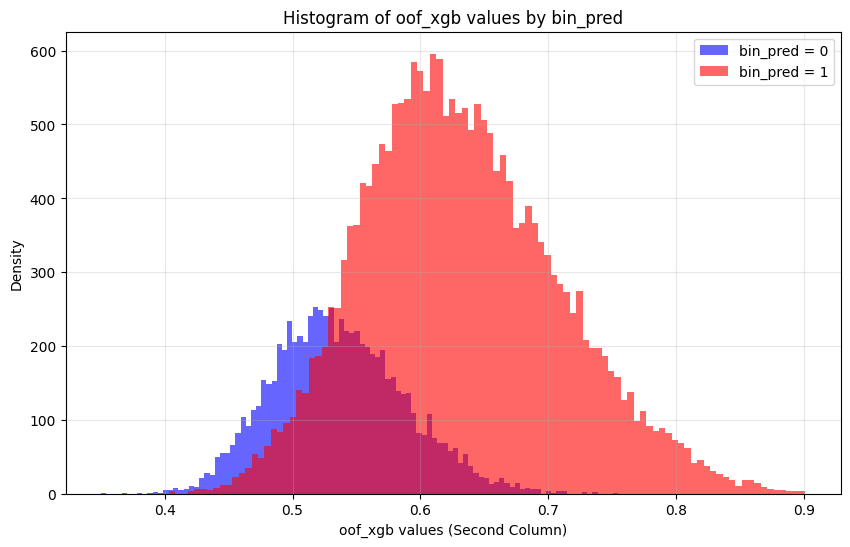

In [ ]:
data_0 = combined_array[combined_array[:, 0] == 0]
data_1 = combined_array[combined_array[:, 0] == 1]


plt.figure(figsize=(10, 6))
plt.hist(data_0[:, 1], bins=100, color='blue', alpha=0.6, label='bin_pred = 0')
plt.hist(data_1[:, 1], bins=100, color='red', alpha=0.6, label='bin_pred = 1')

plt.xlabel('oof_xgb values (Second Column)')
plt.ylabel('Density')
plt.title('Histogram of oof_xgb values by bin_pred')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
combined_array[combined_array[:, 0] == 1, 1] += 0.1

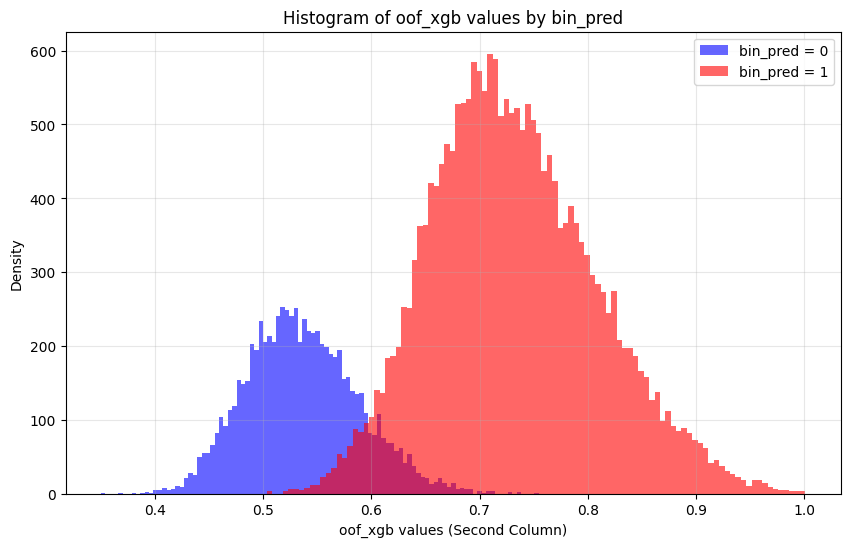

In [ ]:
data_0 = combined_array[combined_array[:, 0] == 0]
data_1 = combined_array[combined_array[:, 0] == 1]

plt.figure(figsize=(10, 6))

plt.hist(data_0[:, 1], bins=100, color='blue', alpha=0.6, label='bin_pred = 0')

plt.hist(data_1[:, 1], bins=100, color='red', alpha=0.6, label='bin_pred = 1')

plt.xlabel('oof_xgb values (Second Column)')
plt.ylabel('Density')
plt.title('Histogram of oof_xgb values by bin_pred')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
y_true = train[["ID","efs","efs_time","race_group"]].copy()
y_pred = train[["ID"]].copy()
y_pred["prediction"] = combined_array[:, 1]

print(y_pred)

          ID  prediction
0          0    0.467571
1          1    0.727407
2          2    0.422341
3          3    0.763258
4          4    0.720265
...      ...         ...
28795  28795    0.555905
28796  28796    0.826011
28797  28797    0.769329
28798  28798    0.577684
28799  28799    0.491914

[28800 rows x 2 columns]


In [ ]:
y_pred = (y_pred >= 0.5).astype(int)


In [ ]:

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_true, axis=1)  # If `y_true` is one-hot encoded


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def score(y_true, y_pred, metric="accuracy"):
    if metric == "accuracy":
        return accuracy_score(y_true, y_pred)
    elif metric == "f1":
        return f1_score(y_true, y_pred)  # Use f1_score(y_true, y_pred, average='macro') for multiclass
    elif metric == "roc_auc":
        return roc_auc_score(y_true, y_pred)  # Only valid for binary classification
    else:
        raise ValueError("Invalid metric specified")

m = score(y_true.copy(), y_pred.copy(), "accuracy")  # Choose "f1" or "roc_auc" as needed
print(f"\nOverall CV for XGBoost =", m)



Overall CV for XGBoost = 0.9991666666666666


In [ ]:

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def score(y_true, y_pred, metric="accuracy"):
    if metric == "accuracy":
        return accuracy_score(y_true, y_pred)
    elif metric == "f1":
        return f1_score(y_true, y_pred)  # Use f1_score(y_true, y_pred, average='macro') for multiclass
    elif metric == "roc_auc":
        return roc_auc_score(y_true, y_pred)  # Only valid for binary classification
    else:
        raise ValueError("Invalid metric specified")

m = score(y_true.copy(), y_pred.copy(), "accuracy")  # Choose "f1" or "roc_auc" as needed
print(f"\nOverall CV for XGBoost =", m)



Overall CV for XGBoost = 0.9991666666666666


In [ ]:

# Handling missing values for numerical and categorical features
for col in train.columns:
    if train[col].dtype == "object":  # Categorical columns
        train[col].fillna(train[col].mode()[0], inplace=True)
        test[col].fillna(test[col].mode()[0], inplace=True)
    else:  # Numerical columns
        train[col].fillna(train[col].mode(), inplace=True)
        test[col].fillna(test[col].mode(), inplace=True)

print('Missing values handled for both categorical and numerical features.')

Missing values handled for both categorical and numerical features.


<ipython-input-32-52365d7b0240>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(train[col].mode(), inplace=True)
<ipython-input-32-52365d7b0240>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train[FEATURES] = scaler.fit_transform(train[FEATURES])
test[FEATURES] = scaler.transform(test[FEATURES])
print('Feature scaling applied.')

Feature scaling applied.


In [ ]:
train['log_efs_time'] = np.log1p(train['efs_time'])
test['log_efs_time'] = np.log1p(test['efs_time'])
print('Log transformation applied to efs_time.')

Log transformation applied to efs_time.


In [ ]:
import pandas as pd
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
warnings.filterwarnings("ignore")

# Load the dataset
train_file_path = "/content/train.csv"
train = pd.read_csv(train_file_path)

# Define features and target
FEATURES = [col for col in train.columns if col not in ['efs', 'efs_time', 'ID']]
TARGET = 'efs'

# Separate features and target variable
X = train[FEATURES]
y = train[TARGET]

# Handle missing values
num_imputer = SimpleImputer(strategy='mean')  # Mean for numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical columns

# Separate numerical and categorical features
num_cols = X.select_dtypes(include=['number']).columns
cat_cols = X.select_dtypes(exclude=['number']).columns

# Impute missing values
X[num_cols] = num_imputer.fit_transform(X[num_cols])
X[cat_cols] = cat_imputer.fit_transform(X[cat_cols])

# Encode categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print('Random Forest Model Trained Successfully!')


Random Forest Model Trained Successfully!


In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
y_pred = model.predict(X_val)
y_proba = model.predict_proba(X_val)[:, 1]
print(f'Accuracy: {accuracy_score(y_val, y_pred):.4f}')
print(f'AUC-ROC: {roc_auc_score(y_val, y_proba):.4f}')

Accuracy: 0.6646
AUC-ROC: 0.7232


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC-ROC: {grid_search.best_score_:.4f}')

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best AUC-ROC: 0.7244


In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best AUC-ROC: {grid_search.best_score_:.4f}')

# Save the trained model
joblib.dump(best_model, 'random_forest_model.pkl')
print('Model saved as random_forest_model.pkl')


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
Best AUC-ROC: 0.7242
Model saved as random_forest_model.pkl


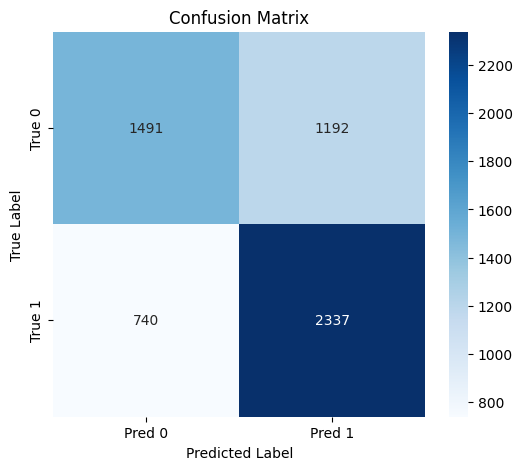

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()